In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder

In [60]:
df=pd.read_csv("insurance.csv")

In [61]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


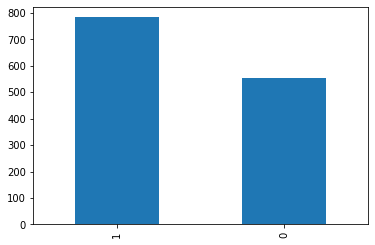

In [62]:
df["insuranceclaim"].value_counts().plot.bar()
plt.show()

In [63]:
df.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


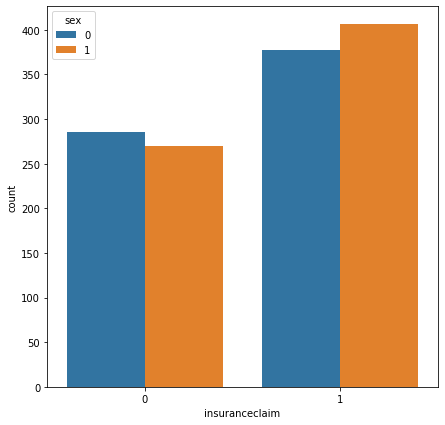

In [64]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="sex")
plt.show()

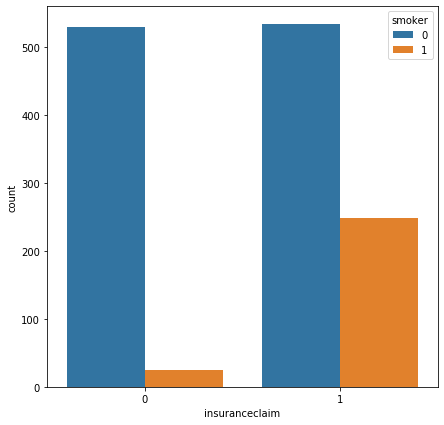

In [65]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="smoker")
plt.show()

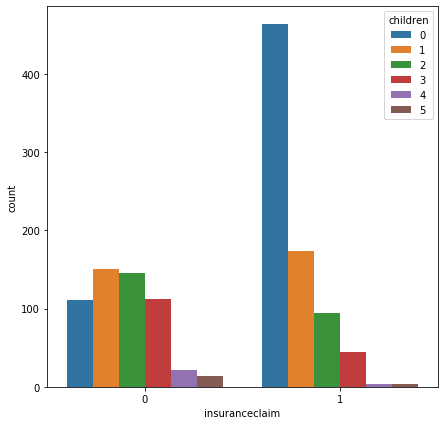

In [66]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="children")
plt.show()

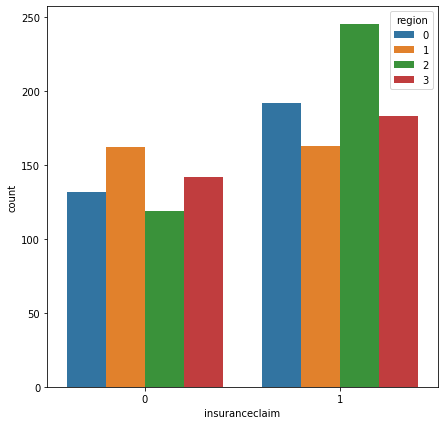

In [67]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="region")
plt.show()

In [68]:
x = df.drop("insuranceclaim",axis=1)
y = df["insuranceclaim"]

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [70]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8034825870646766

In [71]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

clf.score(x_test,y_test)

0.9850746268656716

In [72]:
y_pred=clf.predict(x_test)
r2_score(y_test,y_pred)

0.9372936435720784

In [73]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,

In [74]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       157
           1       0.99      0.99      0.99       245

    accuracy                           0.99       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402



In [76]:
from sklearn.datasets import load_iris
#from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

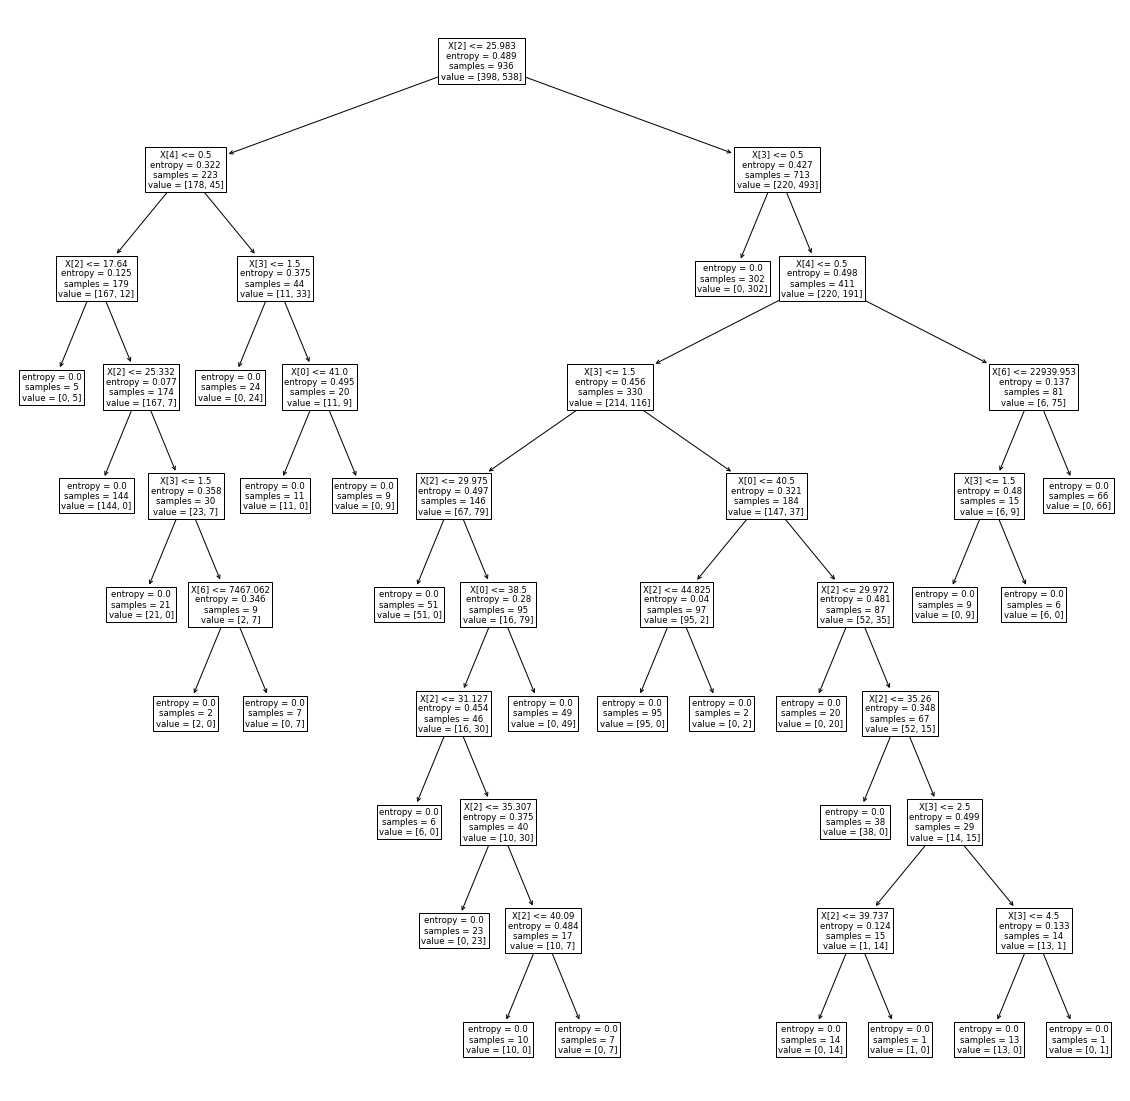

In [77]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf) 
plt.show()

In [78]:
import graphviz
#from sklearn import tree

In [79]:
columns=list(x.columns)
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=columns,class_names=True)
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
f = open("class.txt","w+")
f.write(dot_data)
f.close()